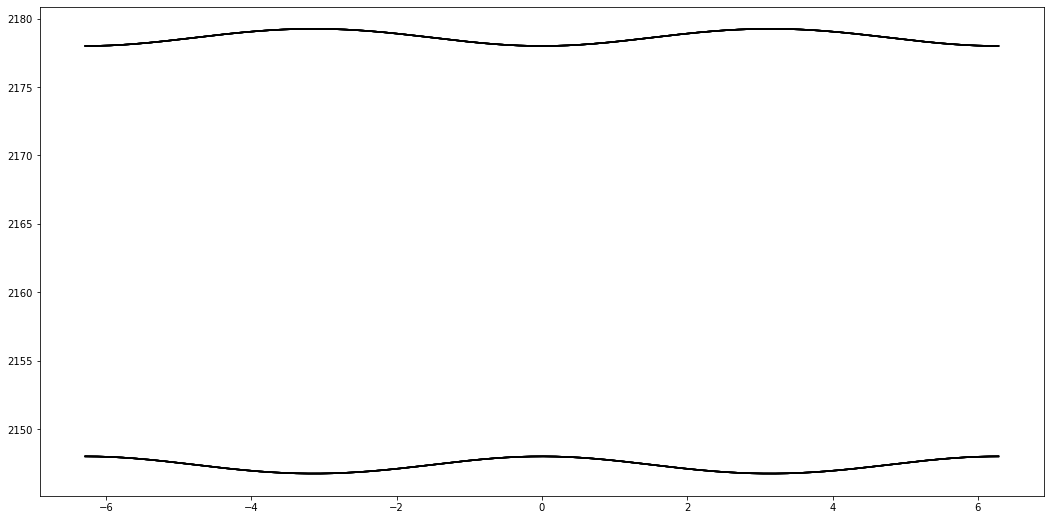

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian( k, N, f0, r0, r1, K):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = f0-1j*r0*f0
        h00[i*4+0, i*4+1] = K
        h00[i*4+0, i*4+2] = 0
        h00[i*4+0, i*4+3] = K*cmath.exp(-1j*k)
        
        h00[i*4+1, i*4+0] = K
        h00[i*4+1, i*4+1] = f0-1j*( r0 + r1 )*f0
        h00[i*4+1, i*4+2] = K
        h00[i*4+1, i*4+3] = 0
        
        h00[i*4+2, i*4+0] = 0
        h00[i*4+2, i*4+1] = K
        h00[i*4+2, i*4+2] = f0-1j*( r0 + r1 )*f0
        h00[i*4+2, i*4+3] = K
        

        h00[i*4+3, i*4+0] = K*cmath.exp(1j*k)
        h00[i*4+3, i*4+1] = 0
        h00[i*4+3, i*4+2] = K
        h00[i*4+3, i*4+3] = f0-1j*r0*f0


    matrix = h00
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=3, f0=2163, r0=1, r1=0.0327, K=15)  # 使用偏函数，固定一些参数
    k = np.linspace(-2*pi, 2*pi,300)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N

    dim_k = k.shape[0]              #k值的多少

    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组

    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()

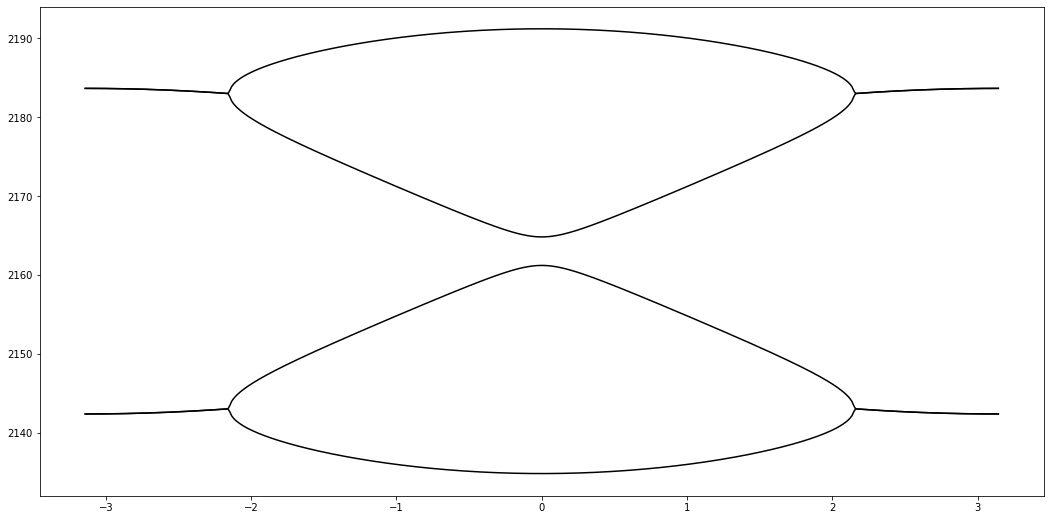

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, f0, r0, r1, K):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = f0-1j*r0*f0
        h00[i*4+0, i*4+1] = K
        h00[i*4+0, i*4+2] = 0
        h00[i*4+0, i*4+3] = K*cmath.exp(-1j*k)
        
        h00[i*4+1, i*4+0] = K
        h00[i*4+1, i*4+1] = f0-1j*r0*f0
        h00[i*4+1, i*4+2] = K
        h00[i*4+1, i*4+3] = 0
        
        h00[i*4+2, i*4+0] = 0
        h00[i*4+2, i*4+1] = K
        h00[i*4+2, i*4+2] = f0-1j*( r0 + r1 )*f0
        h00[i*4+2, i*4+3] = K
        

        h00[i*4+3, i*4+0] = K*cmath.exp(1j*k)
        h00[i*4+3, i*4+1] = 0
        h00[i*4+3, i*4+2] = K
        h00[i*4+3, i*4+3] = f0-1j*( r0 + r1 )*f0


    matrix = h00
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=1, f0=2163, r0=0.0066, r1=0.0066, K=15)  # 使用偏函数，固定一些参数
    k = np.linspace(-pi, pi,500)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N

    dim_k = k.shape[0]              #k值的多少

    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组

    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()

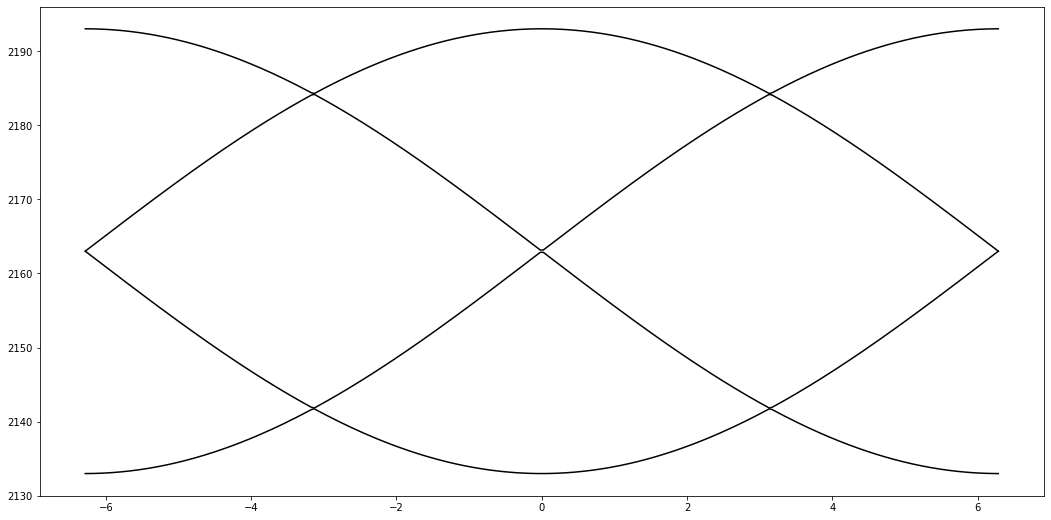

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, f0, r0, r1, K):  # Haldane哈密顿量(N是条带的宽度参数）
    # 初始化为零矩阵
    h00 = np.zeros((4*N, 4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((4*N, 4*N))*(1+0j)

    # 原胞内的跃迁h00
    for i in range(N):
        h00[i*4+0, i*4+0] = f0-1j*r0*f0
        h00[i*4+0, i*4+1] = K
        h00[i*4+0, i*4+2] = 0
        h00[i*4+0, i*4+3] = K*cmath.exp(-1j*k)
        
        h00[i*4+1, i*4+0] = K
        h00[i*4+1, i*4+1] = f0-1j*r0*f0
        h00[i*4+1, i*4+2] = K
        h00[i*4+1, i*4+3] = 0
        
        h00[i*4+2, i*4+0] = 0
        h00[i*4+2, i*4+1] = K
        h00[i*4+2, i*4+2] = f0-1j*r0*f0
        h00[i*4+2, i*4+3] = K
        

        h00[i*4+3, i*4+0] = K*cmath.exp(1j*k)
        h00[i*4+3, i*4+1] = 0
        h00[i*4+3, i*4+2] = K
        h00[i*4+3, i*4+3] = f0-1j*r0*f0


    matrix = h00
    return matrix


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=1, f0=2163, r0=1, r1=0.0327, K=15)  # 使用偏函数，固定一些参数
    k = np.linspace(-2*pi, 2*pi,300)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]   #对hamiltonian（0）矩阵进行列或行的计数   dim=4*N

    dim_k = k.shape[0]              #k值的多少

    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用数组

    i0 = 0
    fig = plt.figure(figsize=(18, 9))
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)      #求本征值
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:])) #sort为行向排序
        i0 += 1 #i0=i0+1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  #画图
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    
    plt.show()   #显示图


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()